<a href="https://colab.research.google.com/github/DzikriDhaniawan/customer_segmentation_and_strategy/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation menggunakan Rule-Based Approach** <br>
Dalam dunia bisnis, memahami karakteristik pelanggan sangat penting untuk meningkatkan efektivitas marketing, meningkatkan konversi, mengoptimalkan strategi promosi, dan meningkatkan customer retention. <br>
Tidak semua pelanggan memiliki karakteristik dan perilaku yang sama. Oleh karena itu, diperlukan segmentasi pelanggan agar strategi bisnis lebih tepat sasaran.<br> <br>

Tujuan Project: <br>
1. Membuat segmentasi pelanggan berdasarkan karakteristik demografis dan perilaku. <br>
2. Menganalisis perbedaan karakteristik tiap segmen. <br>
3. Memberikan rekomendasi strategi bisnis yang relevan untuk setiap segmen. <br>

In [ ]:
import kagglehub

Mengunduh dataset dari Kaggle secara langsung melalui Google Colab

In [ ]:
path = kagglehub.dataset_download("vetrirah/customer")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer' dataset.
Path to dataset files: /kaggle/input/customer


In [ ]:
import os

os.listdir(path)

['sample_submission.csv', 'Train.csv', 'Test.csv']

Dataset memiliki fitur berikut: Gender, Ever_Married, Age, Graduated, Profession, Work_Experience, Spending_Score, Family_Size, dan Segmentation. <br>
Namun dalam project ini, kita tidak menggunakan "Segmentation" sebagai label bawaan dataset, melainkan membuat segmentasi sendiri berdasarkan analisis bisnis.

In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "Train.csv"))

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Implementasi rule-based segmentation untuk menentukan segmentasi customer
1. Young Starters (Segmen dengan age<30)

2. Early Career Builder (Segmen dengan age >30 - <=35)

2. Growing families (Segmen dengan kategori sudah menikah, familly size >3)

3. Established Professional (segmen dengan age >35, work_experience > 5, spending = high)

4. Budget-Conscious Customers (Segmen dengan spending = low, family_size kecil, dan income rendah pada profesi tertentu)

In [ ]:
def segment_customer(row):

    if row['Ever_Married'] == 'Yes' and row['Family_Size'] >= 3:
        return "Growing Families"

    if row['Age'] < 30:
        return "Young Starters"

    elif 30 <= row['Age'] <= 35:
        return "Early Career Builders"

    elif row['Age'] > 35 and row['Work_Experience'] > 5 and row['Spending_Score'] == 'High':
        return "Established Professionals"

    else:
        return "Budget-Conscious"


Menerapkan fungsi ke setiap baris data dan membuat kolom baru bernama "Custom_Segment"

In [ ]:
df['Custom_Segment'] = df.apply(segment_customer, axis=1)

Menghitung rata-rata semua kolom numerik untuk setiap segmen dengan tujuan melihat karakteristik umum tiap segmen.

In [ ]:
df.groupby('Custom_Segment').mean(numeric_only=True)

,ID,Age,Work_Experience,Family_Size
Custom_Segment,,,,
Budget-Conscious,463426.946986,53.902454,2.442359,1.777814
Early Career Builders,463486.737226,32.201251,3.436916,2.943771
Established Professionals,463573.949153,54.576271,8.406780,2.050847
Growing Families,463557.851285,47.979249,2.177679,3.945652
Young Starters,463479.545507,24.085797,2.907732,3.511329


Melihat distribusi jumlah pelanggan di tiap segmen. <br>
Output menunjukkan bahwa Budget-Consious adalah segmen terbesar, dan Established Professionals adalah segmen terkecil.

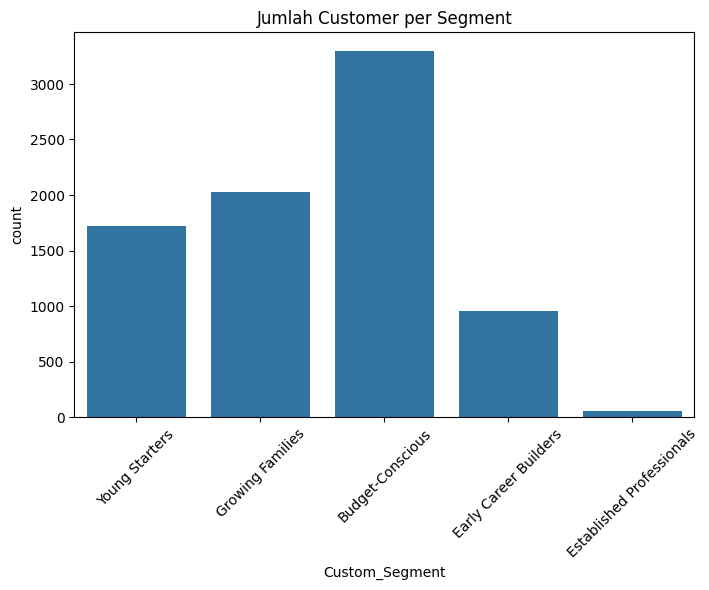

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Custom_Segment')
plt.xticks(rotation=45)
plt.title("Jumlah Customer per Segment")
plt.show()


Menampilkan proporsi spending_score di dalam masing-masing segmen <br>
(low, average, dan high)

In [ ]:
pd.crosstab(df['Custom_Segment'], df['Spending_Score'], normalize='index')


Spending_Score,Average,High,Low
Custom_Segment,,,
Budget-Conscious,0.211451,0.159043,0.629506
Early Career Builders,0.104275,0.029197,0.866528
Established Professionals,0.000000,1.000000,0.000000
Growing Families,0.542490,0.279644,0.177866
Young Starters,0.045217,0.022029,0.932754


Menampilkan proporsi status pernikahan pada setiap segmen, juga memastikan "Growing Families" benar-benar merupakan mayoritas yang sudah menikah.

In [ ]:
pd.crosstab(df['Custom_Segment'], df['Ever_Married'], normalize='index')

Ever_Married,No,Yes
Custom_Segment,,
Budget-Conscious,0.319169,0.680831
Early Career Builders,0.789362,0.210638
Established Professionals,0.000000,1.000000
Growing Families,0.000000,1.000000
Young Starters,0.899584,0.100416


Melihat proporsi customer yang sudah lulus kuliah per segmen, dengan tujuan mengetahui tingkat pendidikan tiap segmen.

In [ ]:
pd.crosstab(df['Custom_Segment'], df['Graduated'], normalize='index')

Graduated,No,Yes
Custom_Segment,,
Budget-Conscious,0.238066,0.761934
Early Career Builders,0.396642,0.603358
Established Professionals,0.206897,0.793103
Growing Families,0.328180,0.671820
Young Starters,0.701055,0.298945


Melihat distribusi profesi dalam  setiap segmen, dengan tujuan memahami latar belakang pekerjaan tiap segmen.

In [ ]:
pd.crosstab(df['Custom_Segment'], df['Profession'], normalize='index')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Custom_Segment,,,,,,,,,
Budget-Conscious,0.414101,0.071429,0.086515,0.127155,0.051416,0.028017,0.027094,0.163485,0.030788
Early Career Builders,0.220682,0.146055,0.090618,0.130064,0.017058,0.298507,0.049041,0.001066,0.046908
Established Professionals,0.275862,0.017241,0.017241,0.034483,0.275862,0.103448,0.034483,0.224138,0.017241
Growing Families,0.390195,0.061531,0.108554,0.136568,0.187594,0.031516,0.023012,0.038019,0.023012
Young Starters,0.098765,0.114638,0.067607,0.081717,0.014697,0.524397,0.037625,0.001176,0.059377


Menampilkan distribusi umur tiap segmen dalam bentuk boxplot, dengan tujuan melihat penyebaran umur tiap segmen secara visual. <br>
Penggunaan boxplot membantu melihat median, range, dan outlier.

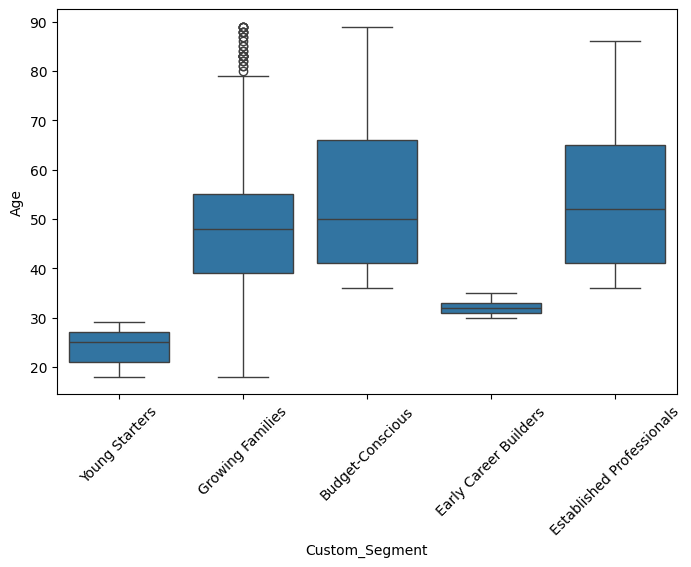

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Custom_Segment', y='Age')
plt.xticks(rotation=45)
plt.show()

Mengubah spending_score dari kategorikal ke numerik supaya bisa dihitung rata-ratanya dengan tujuan menghitung dan menampilkan skor belanja rata-rata segmen per numerik.<br>
Low = 1 <br>
Average = 2 <br>
High = 3.

In [ ]:
spending_map = {'Low':1, 'Average':2, 'High':3}
df['Spending_Numeric'] = df['Spending_Score'].map(spending_map)

df.groupby('Custom_Segment')['Spending_Numeric'].mean()


,Spending_Numeric
Custom_Segment,
Budget-Conscious,1.529537
Early Career Builders,1.162669
Established Professionals,3.000000
Growing Families,2.101779
Young Starters,1.089275


Melihat jumlah masing masing customer per segmen.

In [ ]:
df['Custom_Segment'].value_counts()


,count
Custom_Segment,
Budget-Conscious,3301
Growing Families,2024
Young Starters,1725
Early Career Builders,959
Established Professionals,59


**Rekomendasi Strategi per Segmen**

**1. Young Starters**
1. Entry Level Product Strategy
Fokus pada produk dengan harga terjangkau dan fitur dasar yang relevan untuk kebutuhan awal karier. Strategi ini bertujuan untuk menarik pelanggan muda yang masih sensitif terhadap harga. dengan menawarkan opsi yang "mudah dijangkau".

2. Flash Sale & Limited Time Discount
Menggunakan promo berbatas waktu untuk mendorong impulse buying. Sehingga segmen ini cenderung responsif terhadap diskon dan campaign yang terasa seperti kesempatan berharga.

**2. Early Career Builders (30-35 Tahun)**
1. Pay-Later Offering
Tawarkan opsi cicilan atau paylater untuk produk dengan harga menengah. Segmen ini mulai memiliki daya beli lebih baik, tetapi tetap mempertimbangkan cash flow.

2. Personalized Email Campaign
Menggunakan data historis pembelian untuk mengirimkan rekomendasi produk yang relevan. Segmen ini cenderung lebih rasional dan mempertimbangkan manfaat produk.

**3. Growing Families**
1. Family Bundle Package
Menawarkan paket produk yang dirancang untuk kebutuhan keluarga. Strategi ini meningkatkan volume pembelian dalam satu transaksi. Cocok untuk kebutuhan rutin atau konsumsi rumah tangga.

2. Cashback & Loyalty
Memberikan cashback atau sistem membership untuk pembelian dengan nominal tertentu. Segmen ini cukup loyal jika merasa mendapatkan benefit jangka panjang.

**4. Established Professionals**
1. Premium Product Positioning
Menawarkan produk eksklusif dengan kualitas tinggi dan fitur lengkap. Strategi ini memanfaatkan daya beli kuat serta preferensi terhadap kualitas dibanding harga.

2. High end Cross Selling
Rekomendasikan produk tambahan dengan nilai tinggi yang relevan dengan histori pembelian mereka. Strategi ini meningkatkan revenue per customer tanpa perlu akuisisi pelanggan baru.

**5. Budget Conscious**
1. Value for Money Campaign
Tonjolkan manfaat produk dibanding harga yang dibayarkan. Strategi ini cocok untuk pelanggan yang rasional dan mempertimbangkan efisiensi pengeluaran. Fokus pada durability dan fungsi utama produk.

2. Educational Marketing
Berikan edukasi mengenai manfaat produk melalui konten atau sosial media. Segmen ini perlu diyakinkan sebelum membeli. Strategi ini membangun trust dan meningkatkan conversion secara bertahap.